参考：https://logics-of-blue.com/python-time-series-analysis/
https://blog.brains-tech.co.jp/entry/arima-tutorial-1
https://momonoki2017.blogspot.com/2018/02/python1.html

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

import statsmodels.api as sm

In [2]:
data1 = pd.read_csv('AirPassengers.csv', 
                   index_col='ds', 
                   parse_dates=True, 
                   dtype='float')
data1.head()

,y
ds,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [3]:
ts1 = data1['y'] 
ts1.head()

ds
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: y, dtype: float64

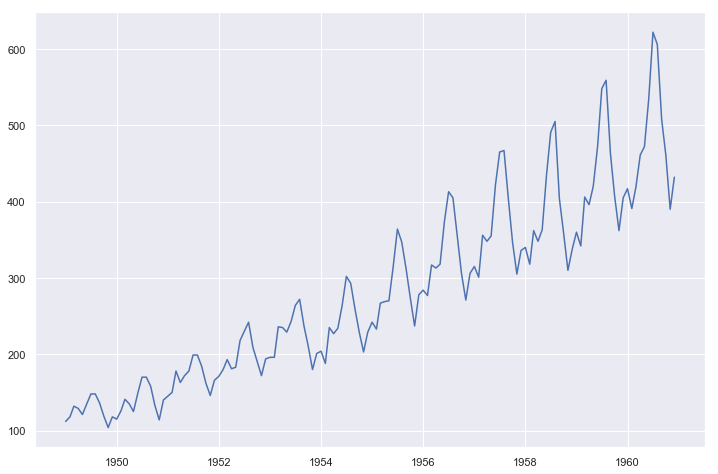

In [4]:
plt.figure(figsize=(12,8))
plt.plot(ts1)

/Users/ryosukeokubo/.pyenv/versions/3.6.6/envs/tensorflow/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


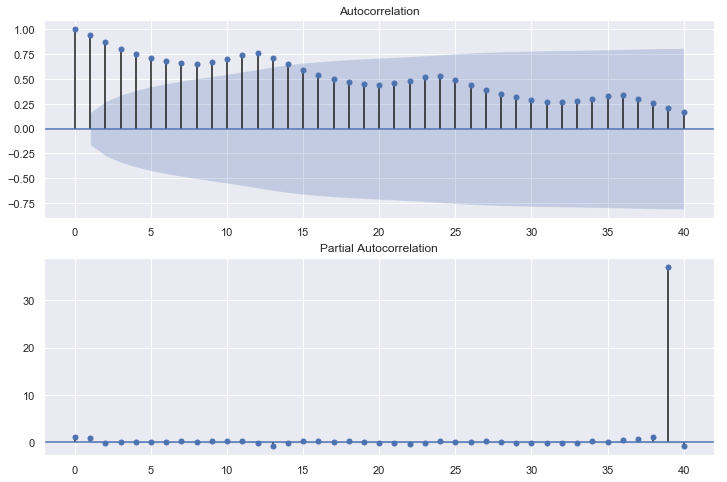

In [5]:
#コレログラム
ts_acf1 = sm.tsa.stattools.acf(ts1, nlags=40)

ts_pacf1 = sm.tsa.stattools.pacf(ts1, nlags=40, method='ols')

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1, lags=40, ax=ax2)

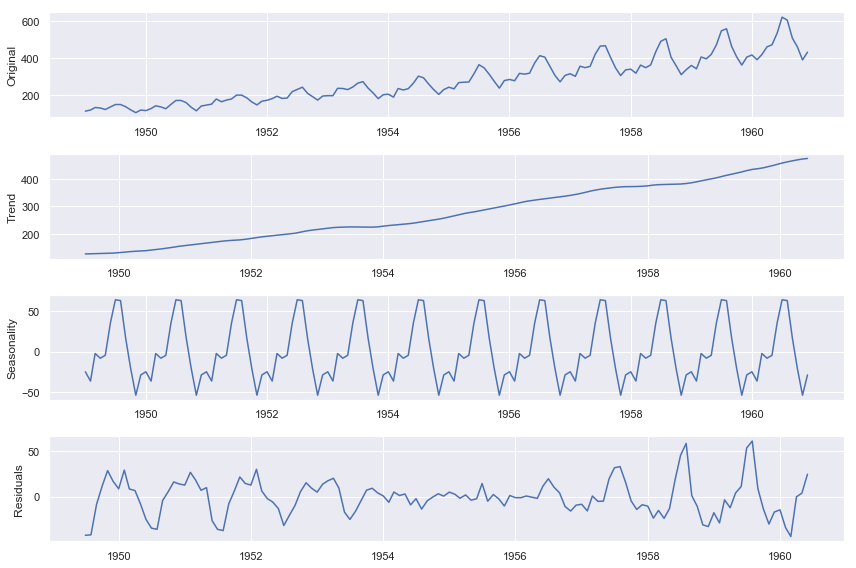

In [6]:
#分解
res = sm.tsa.seasonal_decompose(ts1)

original = ts1 # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ

plt.figure(figsize=(12,8)) # グラフ描画枠作成、サイズ指定

# オリジナルデータのプロット
plt.subplot(411) # グラフ4行1列の1番目の位置（一番上）
plt.plot(original)
plt.ylabel('Original')

# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

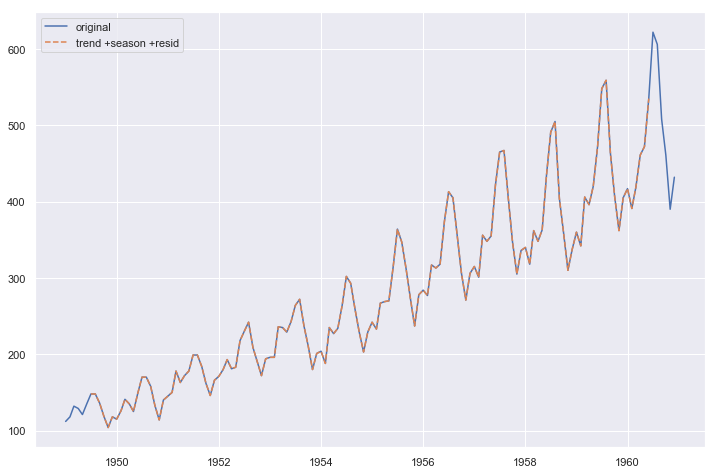

In [7]:
sum_three_data = trend + seasonal + residual # トレンド + 季節性 + 残差

plt.figure(figsize=(12,8)) # グラフ描画枠作成、サイズ指定
plt.plot(original, label='original')
plt.plot(sum_three_data, label='trend +season +resid', linestyle='--')
plt.legend(loc='best') # 凡例表示

In [8]:
data2 = pd.read_csv('ebina_kion.csv', 
                   index_col='Month', 
                   parse_dates=True, 
                   dtype='float')
data2.head()

,kion
Month,
1997-01-01,4.8
1997-02-01,5.8
1997-03-01,9.7
1997-04-01,14.3
1997-05-01,18.5


In [9]:
ts2 = data2['kion'] 
ts2.head()

Month
1997-01-01     4.8
1997-02-01     5.8
1997-03-01     9.7
1997-04-01    14.3
1997-05-01    18.5
Name: kion, dtype: float64

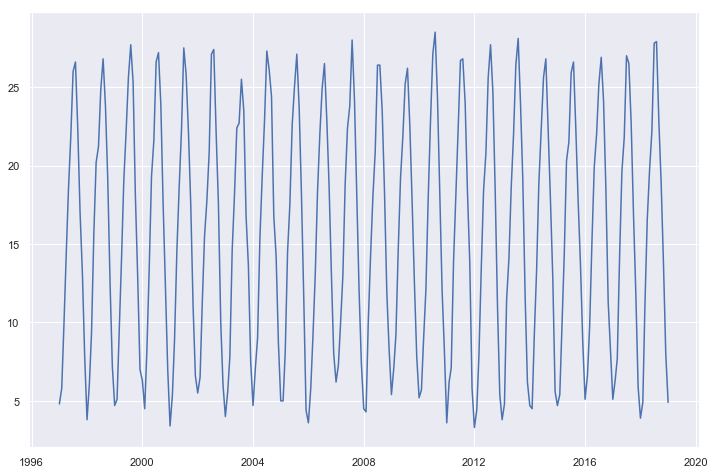

In [10]:
plt.figure(figsize=(12,8))
plt.plot(ts2)

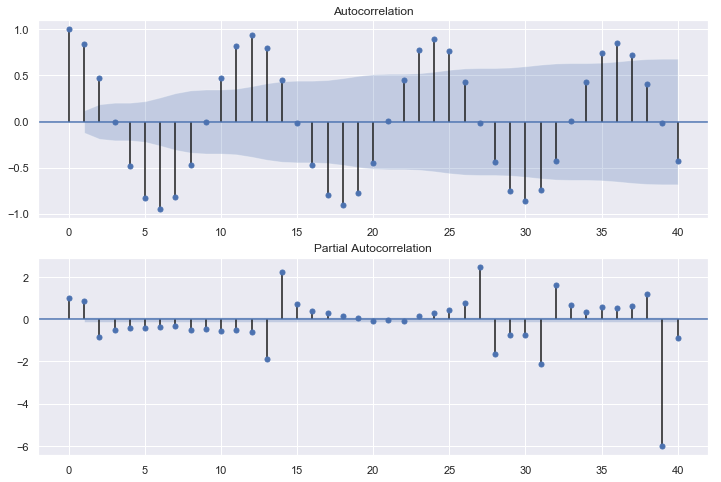

In [11]:
#コレログラム
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts2, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts2, lags=40, ax=ax2)

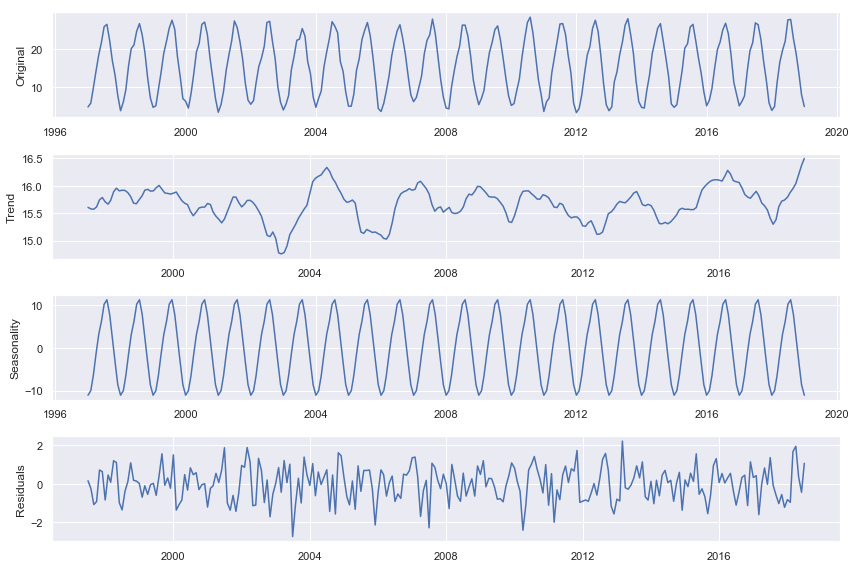

In [12]:
#分解
res = sm.tsa.seasonal_decompose(ts2)

original = ts2 # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ

plt.figure(figsize=(12,8)) # グラフ描画枠作成、サイズ指定

# オリジナルデータのプロット
plt.subplot(411) # グラフ4行1列の1番目の位置（一番上）
plt.plot(original)
plt.ylabel('Original')

# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

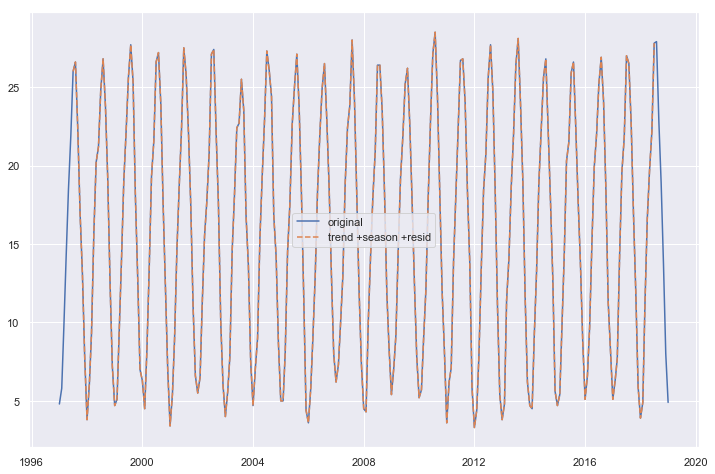

In [13]:
sum_three_data = trend + seasonal + residual # トレンド + 季節性 + 残差

plt.figure(figsize=(12,8)) # グラフ描画枠作成、サイズ指定
plt.plot(original, label='original')
plt.plot(sum_three_data, label='trend +season +resid', linestyle='--')
plt.legend(loc='best') # 凡例表示